### 1. Terapkan konsep kompresi citra menggunakan image pilihan sendiri

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
sns.set()

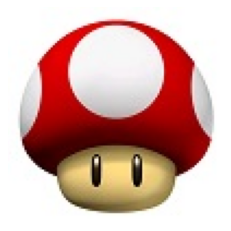

In [14]:
# Membaca Image
jamur = mpimg.imread('jamur.jpg')
ax = plt.axes(xticks=[], yticks=[])
# Output Images
plt.imshow(jamur)

In [15]:
jamur.shape

(100, 100, 3)

In [16]:
data = jamur / 255.0
data = data.reshape(100 * 100, 3)
data.shape

(10000, 3)

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

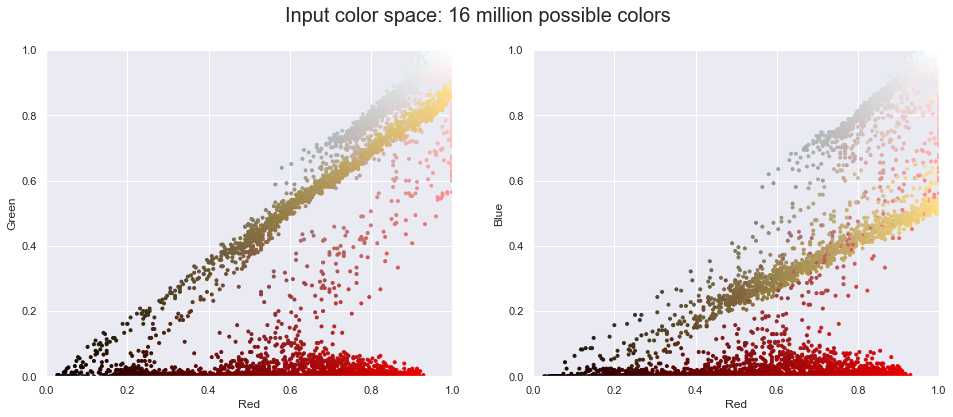

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')

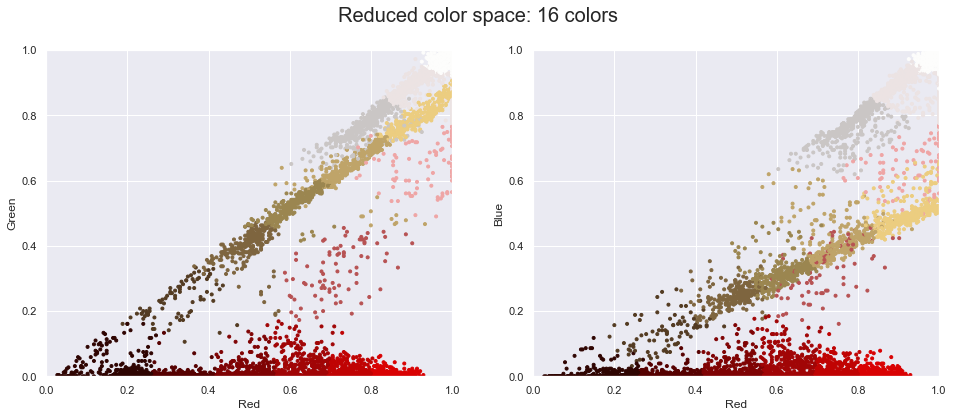

In [19]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

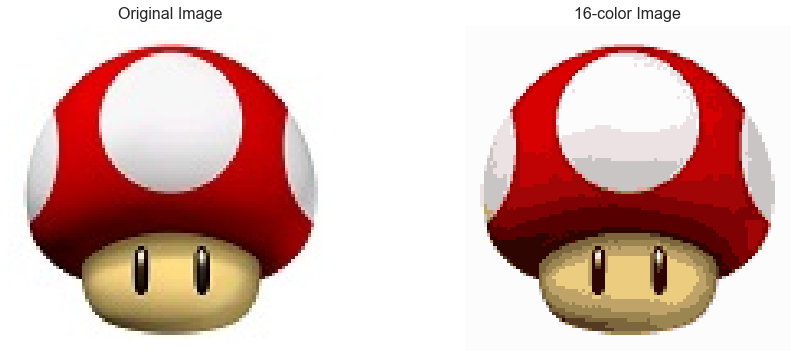

In [20]:
jamur_recolored = new_colors.reshape(jamur.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(jamur)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(jamur_recolored)
ax[1].set_title('16-color Image', size=16)

### 2. Tentukan hasil Elbow Method dan visualisasi line chartnya dengan function sebagai berikut:

In [21]:
from sklearn.cluster import KMeans

In [22]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] -curr_center[1]) * 2
        sse.append(curr_sse)
    return sse

In [23]:
k_max = 10
y = calculate_WSS(data, k_max)

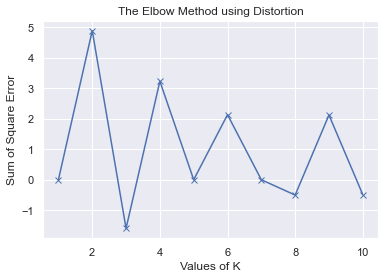

In [24]:
plt.plot(range(1, k_max+1), y, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of Square Error')
plt.title('The Elbow Method using Distortion')
plt.show()

### 3. Tentukan silhoutte dan line chartnya dengan function sebagai berikut:

In [26]:
from sklearn.metrics import silhouette_score
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, k_max+1):
  kmeans = KMeans(n_clusters=k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric='euclidean'))

sil

[0.7741140331977862,
 0.7313508804991501,
 0.7024229435270216,
 0.6977968811446211,
 0.6912645835190964,
 0.6751679929423267,
 0.674790648925159,
 0.6400486649847776,
 0.6287922148632038]

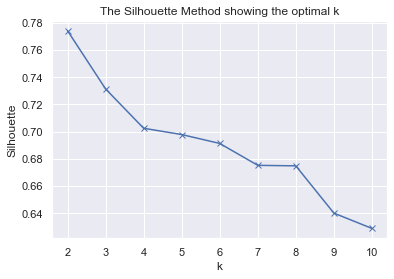

In [27]:
# Visualisasi Hasil Elbow Method dengan scatter plot
plt.plot(range(2, 11), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('The Silhouette Method showing the optimal k')
plt.show()